In [3]:
import pandas as pd

In [ ]:
#evaluation metrics need to learn
# roc auc, f-score, MAE, MSE 

In [4]:
#some classification and regression metrics
from sklearn.metrics import roc_auc_score, f1_score, mean_squared_error

In [5]:
import numpy as np

In [4]:
def rmsle(y_true, y_pred):
    diffs = np.log(y_true + 1) - np.log(y_pred +1)
    squares = np.power(diffs, 2)
    err = np.sqrt(np.mean(squares))
    return err

## Initial EDA

In [6]:
twosigma_train = pd.read_json("./two-sigma-connect-rental-listing-inquiries/train.json")
print(twosigma_train.shape)

(49352, 15)


In [6]:
twosigma_test = pd.read_json("./two-sigma-connect-rental-listing-inquiries/test.json")
print(twosigma_test.shape)

(74659, 14)


In [8]:
#lets look at the column 
print(twosigma_train.columns.tolist())

['bathrooms', 'bedrooms', 'building_id', 'created', 'description', 'display_address', 'features', 'latitude', 'listing_id', 'longitude', 'manager_id', 'photos', 'price', 'street_address', 'interest_level']


In [9]:
twosigma_train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [12]:
#the distribution of interest level
twosigma_train.interest_level.value_counts()

interest_level
low       34284
medium    11229
high       3839
Name: count, dtype: int64

In [16]:
twosigma_train.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [15]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [21]:
#find the median price by the interest level
prices = twosigma_train.groupby('interest_level', as_index=False)['price'].median()
# as_index= false in order not to turn interest_level into index
print(prices)

  interest_level   price
0           high  2400.0
1            low  3300.0
2         medium  2895.0


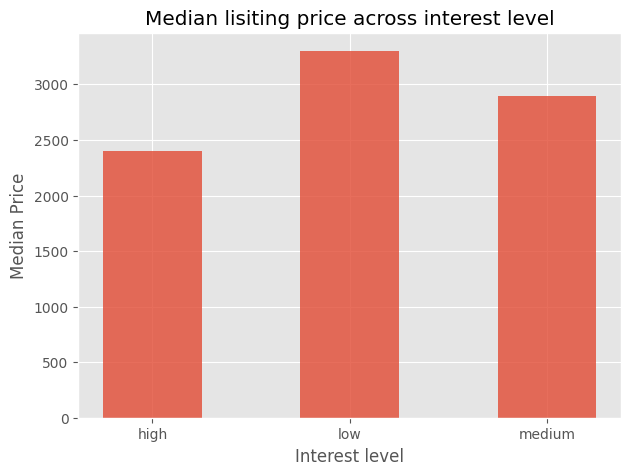

In [25]:
#draw a barplot
fig = plt.figure(figsize=(7,5))
plt.bar(prices.interest_level, prices.price, width=0.5, alpha=0.8) #alpha is the transparency of color

#set titles
plt.xlabel("Interest level")
plt.ylabel("Median Price")
plt.title('Median lisiting price across interest level')
#show
plt.show()

## Local validation

in order to overfit, one thing we can do is holdout test. basically split the data into train and test. but still this could lead to overfitt.

a better idea is k-fold cross-validation. basically split the data into for ex 5 fold. and each fold will be train and test data.


In [26]:
#impoort KFold
from sklearn.model_selection import KFold

In [28]:
#create  fold object
kf = KFold(n_splits=5, shuffle=True, random_state= 123)

In [30]:
#loop through each cross-validatoin split
for train_index, test_index in kf.split(twosigma_train):
    #get training and testing data for the correspending split
    cv_train, cv_test = twosigma_train.iloc[train_index], twosigma_train.iloc[test_index]

## Stratified K-fold
similar with k-fold validation, but it will preserve the distribution in the overall data into the folds. for example in the whole train data theres 40% a and 60% b. then in the each fold, thats also how the target data distributed  

In [31]:
#import
from sklearn.model_selection import StratifiedKFold

strf_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

In [35]:
#the target in this case is interest_level
for train_index, test_index in strf_kf.split(twosigma_train, twosigma_train['interest_level']):
    cv_trai_sf, cv_test_sf = twosigma_train.iloc[train_index], twosigma_train.iloc[test_index]

## Validation Usage

data leakage -> the model seem accurate until making prediction in a real-wordl environment (it perfroms badly on rel world data)

for example in time series data, you need to be carefull with how to split the data, we cant just cant just data in the future to predict data in the past, its not what happen in real world. so we need to design the fold with only data in the past predict the future.

### Time K-fold cross-validation

In [37]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
time_kfold = TimeSeriesSplit(n_split=5)

In [ ]:
train =t rain.sort_values('date') #sort the data based on date

for train_index, test_index in time_kfold.split(train):
    cv_train, cv_test = train.iloc[train_index], train_iloc[test_index]

now to evaluate the model, we will calculate the evaluation metrics for each iteration and then calculate the average

# Feature Engineering

In [ ]:
#sometimes in kaggle the data are split between the train and test dataset
#we can use concat to join the train and test data
data = pd.concat([train, test])

In [8]:
#create new column as simple as add id to the dataframe
twosigma_train["price_per_bedroom"] = twosigma_train.price / twosigma_train.bedrooms

In [9]:
twosigma_train.head(2)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,price_per_bedroom
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium,2400.0
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low,1900.0


In [15]:
#convert string to date
twosigma_train['created_date'] = pd.to_datetime(twosigma_train['created'])

In [11]:
twosigma_train.head(2)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,price_per_bedroom,created_date
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium,2400.0,2016-06-16 05:55:27
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low,1900.0,2016-06-01 05:44:33


### Categorical Feature

### 1. Label Encoding
for example if there are categorical class; A,B,C then the A is mapped to 0, B=1 and C=2. *this approach is harmfull to linear model but works for tree based model*

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['cat_endoced'] = le.fit_transform(df['cat']) #encode the column cat

## One-Hot Encoding
the problems with this approach is if we 1000 caegories then we we will have arounf 1000 columns

In [ ]:
#create one hot encoding 
ohe = pd.get_dummies(df['cat'], prefix='ohe_cat')
#drop the initial column
df..drop('cat', axis=1, inplace=True)

#combine the original data adn the one hot encoding
df = pd.concat([df, ohe], axis = 1)

## Binary Feature


In [ ]:
le = LabelEncoder()
dt['binary_feature'] = le.fit_transform(pd['binary)feat'])

## Target Encoding

now this if for categories with high cardinality, for example more than 10 categories features.
basically its the combination of label encoder and OHE. there are many ways to do this, but the most used is mean target encoder.


the main idea is, we can calculate the mean value of the target variable (the column that we want to predict). for example we have this data:

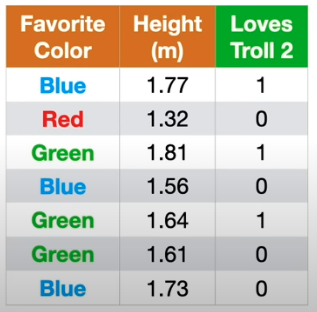

there are 1 people who like troll in all 3 people who like blue. so the value is 1/3

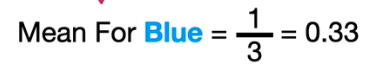

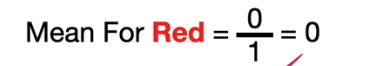

but for people who like red there is only 1 people so there is not enough data.
below is the final calculation for favorite color anid we can see that there is aprobelm here for the people who like red color.

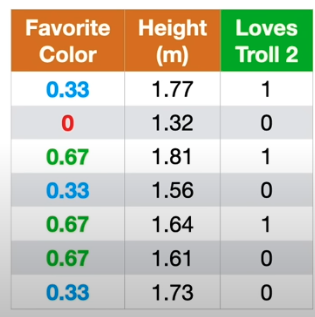

(picture source: https://www.youtube.com/watch?v=589nCGeWG1w)

## Weighted Mean Target Encoding
sometimes called bayesian mean encoding

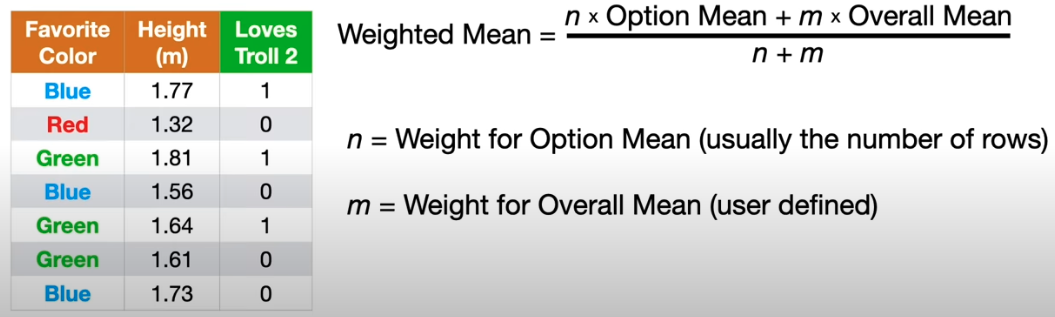

for blue, option mean = 1/3, and n = 3 because there is 3 data.
the overall mean is for all data so its 3/7 (3 out of 7 loves troll). m is user defined and is a hyper parameter, for this example the m =2. because we need at least 3 rows of data before the option mean (the mean for blue 1/3), becomes more important than the overall mean (3/7)

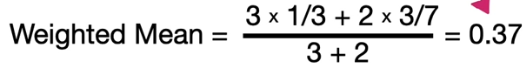

now for red, the m = 2

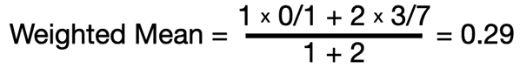

the same way with green
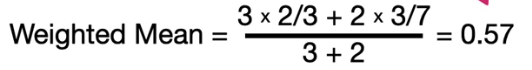

this is the comparison between with weighted and not
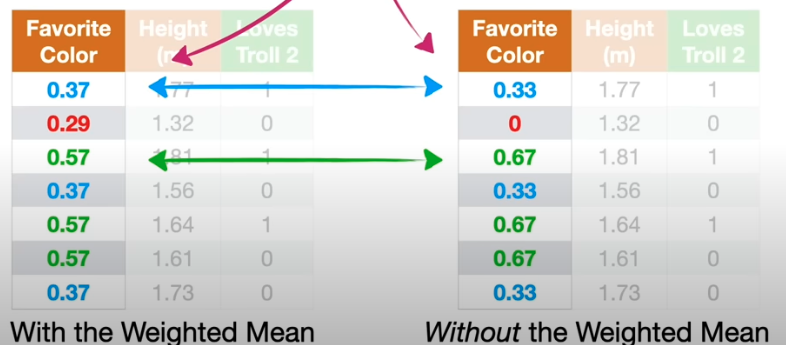

(picture source: https://www.youtube.com/watch?v=589nCGeWG1w)

in the comparison we can see theres not much difference in lue and green. but or red theres a significance difference. 

now this method is prone to data leakage. so the optimized method is k fold targeting

## K fold targeting (Leave one out target encoding)
for example if we set the k = 5, then there is set 1,2,3,4,5 to calculate the weighted mean of fold 1, ONLY use the target variable in fold 2,3,4,5. 

**NOTE** : this process reduces data leakage because,the orws do not use their own target values to calculate their encoding

reference for k fold target encoding : https://www.kaggle.com/code/anuragbantu/target-encoding-beginner-s-guide

## Missing data

impute missing data:
1. mean or median -> for numerical data
2. put constant value

missing data on catgeorical data
1. most frequent category
2. new category imputation

In [ ]:
#to count the missing value in each column
df.isnull().sum()

In [ ]:
#missing data for numerical data
#we use simple imputer library from SK learn

from sklearn.impute import SimpleImputer

#mean strategy
mean_imputer = SimpleImputer(strategy='mean')

#constant strategy
constant_imputer = SimpleImputer(strategy='constant', fill_value=-999)

#imputation process
df[['num']] = mean_imputer.fit_transform(df[['num']])

In [ ]:
#missing data on catgegorical data
#using most frequent data
frequent_imputer = SimpleImputer(strategy='most_frequent')
#new category
constant_imputer = SimpleImputer(strategy='constant', fill_value="NA")

#imputation process
df[['cat']] = constant_imputer.fit_transform(df[['cat']])

## Baseline Model
baseline model is basically start with simple model and then we slowly learn and improve it

In [ ]:
#lets start with new york city data
taxi_train = pd.read_csv('taxi_train.csv')
taxi_test = pd.read_csv('taxi_test.csv')

#the problem is we are trying to predict fare amount for a taxi ride in new york city
# the evaluation metrics is root mean squared

In [1]:
from sklearn.model_selection import train_test_split

In [ ]:
#create local validation 
validation_train, validation_test = train_test_split(
    taxi_train,
    test_size=0.3,
    random_state=123
)

### lets try sklearn gradient boosting model on all the numeric features available


In [3]:
#select only the numerical feature
features = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',
           'passenger_count']

In [5]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#Train a Gradient Boosting model
gb = GradientBoostingRegressor()
gb.fit(taxi_train[features], taxi_train.fare_amount)

#making prediction
taxi_test['fare_amount'] = gb.predict(taxi_test[features])

In [ ]:
#write predictions file
taxi_test[['id','fare_amount']].to_csv('gb_sub.csv', index=False)

## Model Ensembling
The idea of ensemble learning is to build a prediction model by combining the strength of a collection of simpler base models.


###  Model Stacking
here are the steps:
1. split data into two part
2. train multiple models on Part 1
3. Make predictions on Part 2
4. Make preddictions on the test data
5. Train a new model on part 2 using predictions as features
6. make prediction on the test data using 2nd level model